<a href="https://colab.research.google.com/github/AdritPal08/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install and setup kaggle with colab**

In [ ]:
#install Kaggle
!pip install -q Kaggle

In [15]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adritpal08","key":"24c02d65814a28c21e8985ca6932e834"}'}

In [16]:
#create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [18]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [22]:
 # to list all datasets in kaggle
#  ! kaggle datasets list

## **Downloading the dataset from Kaggle**

In [19]:
# download the dataset from kaggle
! kaggle competitions download -c house-prices-advanced-regression-techniques

100% 199k/199k [00:00<00:00, 532kB/s]
100% 199k/199k [00:00<00:00, 531kB/s]


In [20]:
# unzip the dataset
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


##**Installing all the required libraries**

In [ ]:
!pip install -q numpy==1.21.4
!pip install -q spacy==3.4.0
!pip install -q numba==0.53

In [ ]:
!pip install -q  pycaret

In [ ]:
!pip install -q catboost

In [ ]:
!pip install -q xgboost==1.1.1

In [135]:
# for data analysis
!pip install -q pandas_profiling

## **Importing required libraries**

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

## **Importing all datasets**

In [25]:
train_dataset =pd.read_csv('train.csv')
X_test =pd.read_csv('test.csv')
Y_test =pd.read_csv('sample_submission.csv')

In [26]:
train_dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [27]:
Y_test.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [56]:
X_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

## **Merge two dataset**

In [58]:
test_dataset=X_test.merge(Y_test,on='Id')
test_dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition      SalePrice  
0      6   2010        WD         Normal  169277.052498  
1      6   2010        WD         Normal  187758.393989  
2      3   2010        WD         Normal  183583.683570  
3      6   2010        WD         Normal  179317.477511  
4      1   2010        WD         Normal  150730.079977  

[5 rows x 81 columns]

In [101]:
# statistical info

train_dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [107]:
# check for null values
null=train_dataset.isna().sum()
print(null[null > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [111]:
# datatype info

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [112]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
train_dataset.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [113]:
def overview_dataset(df):
    # Observetions
    print("Number of observetion:", df.shape[0])
    # Features
    print("Number of features:", df.shape[1])
    print("-"*60)
    #Categorical Features
    print("Categorical Features:", df.select_dtypes(include = [object]).columns)
    print("")
    # Numerical Features
    print("Numerical Features:", df.select_dtypes(include = [int,float]).columns)
    
overview_dataset(train_dataset)

Number of observetion: 1460
Number of features: 81
------------------------------------------------------------
Categorical Features: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Numerical Features: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF',

In [129]:
# train_dataset['Neighborhood'].value_counts()

In [130]:
categorical = []
for i in train_dataset.columns:
    if (train_dataset[i].dtype=='object'):
        categorical.append(i)
print("Categorical Attribute : {}\n ".format(len(categorical)))
categorical.append('MSSubClass')

Categorical Attribute : 43
 


In [132]:
for i in categorical:
    print(i)
    print(train_dataset[i].value_counts())
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn

In [117]:
Corr_matrix=train_dataset.corr()
Corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

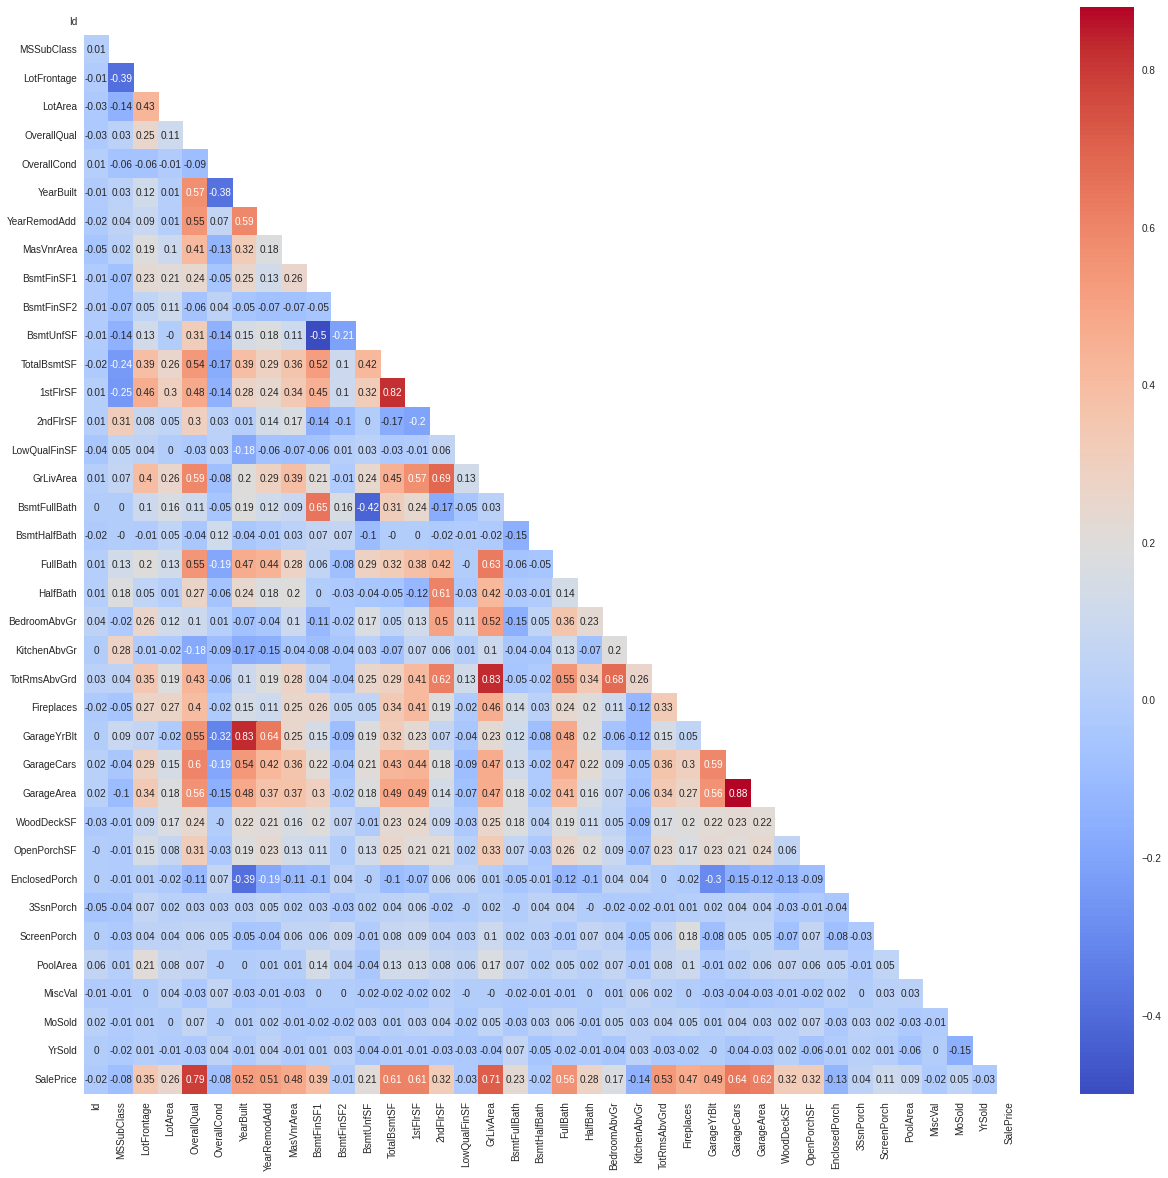

In [122]:
plt.figure(figsize=(21,20))
corr = train_dataset.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Want diagonal elements as well
# mask[np.diag_indices_from(mask)] = False

sns.heatmap(data=corr, annot=True,cmap='coolwarm',mask=mask)
plt.xticks(rotation=90)
plt.show()

# Detailed report of the dataset

In [137]:
# pp.ProfileReport(train_dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# enabled colab mode in pycaret

In [46]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# import pycaret regression 

In [47]:
from pycaret.regression import *

# Setting up Environment in PyCaret

In [114]:
#list of columns that are categorical
cat_f = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [134]:
housing = setup (train_dataset, target = 'SalePrice', 
                categorical_features = cat_f,
                ignore_features= ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Id'],
                ordinal_features = {
                         'Utilities' : ['AllPub', 'NoSeWa'],
                           'LandSlope':['Gtl', 'Mod', 'Sev'],
                           'OverallQual':['1','2','3','4','5','6','7','8','9','10'],
                           'MoSold':['1','2','3','4','5','6','7','8','9','10','11','12'],
                       },
                high_cardinality_features =['Neighborhood','Exterior2nd','MSSubClass','Exterior1st'],
                normalize = True,
                transformation = True,
                session_id = 123,
                remove_multicollinearity = True, #rop one of the two features that are highly correlated with each other
                ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the dataset.
                combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined together as a single level
      )

Description             Value
0                               session_id               123
1                                   Target         SalePrice
2                            Original Data        (1460, 81)
3                           Missing Values              True
4                         Numeric Features                18
5                     Categorical Features                56
6                         Ordinal Features              True
7                High Cardinality Features              True
8                  High Cardinality Method         frequency
9                    Transformed Train Set       (1021, 195)
10                    Transformed Test Set        (439, 195)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              8679
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation              True
30                   Transformation Method       yeo-johnson
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance              True
35                     Combine Rare Levels              True
36                    Rare Level Threshold               0.1
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity              True
41             Multicollinearity Threshold               0.9
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['MSZoning',
                                                            'Street',
                                                            'LotShape',
                                                            'LandContour',
                                                            'Utilities',
                                                            'LotConfig',
                                                            'LandSlope',
                                                            'Neighborhood',
                                                            'Condition1',
                                                            'Condition2',
                                                            'BldgType',
                                  

# Viewing the pre-processed data

In [85]:
#Viewing the pre-processed data
get_config('X')

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X)
INFO:logs:Global variable: X returned as       LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0       -0.201473 -0.190344   1.071374      0.873007    0.514726    0.561701   
1        0.492574 -0.073642   0.189798     -0.430899   -0.573652    1.137218   
2       -0.062664  0.093800   1.006072      0.824714    0.325926    0.096209   
3       -0.432823 -0.078716  -1.801911     -0.720656   -0.573652   -0.475076   
4        0.677654  0.399254   0.973421      0.728129    1.369880    0.453791   
...           ...       ...        ...           ...         ...         ...   
1455    -0.340283 -0.244433   0.940770      0.728129   -0.573652   -0.932105   
1456     0.723924  0.289148   0.255100      0.148615    0.087149    0.739434   
1457    -0.155204 -0.130268  -0.952986      1.017886   -0.573652   -0.350240   
1458    -0.062664 -0.061769  -0.659127      0.534958   -0.573652   -0.828427   
1459     0

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0       -0.201473 -0.190344   1.071374      0.873007    0.514726    0.561701   
1        0.492574 -0.073642   0.189798     -0.430899   -0.573652    1.137218   
2       -0.062664  0.093800   1.006072      0.824714    0.325926    0.096209   
3       -0.432823 -0.078716  -1.801911     -0.720656   -0.573652   -0.475076   
4        0.677654  0.399254   0.973421      0.728129    1.369880    0.453791   
...           ...       ...        ...           ...         ...         ...   
1455    -0.340283 -0.244433   0.940770      0.728129   -0.573652   -0.932105   
1456     0.723924  0.289148   0.255100      0.148615    0.087149    0.739434   
1457    -0.155204 -0.130268  -0.952986      1.017886   -0.573652   -0.350240   
1458    -0.062664 -0.061769  -0.659127      0.534958   -0.573652   -0.828427   
1459     0.261225 -0.039444  -0.169363     -0.962120   -0.573652    0.824069   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0      -0.282439  -0.940691    -0.434479 -0.774640  ...             0.0   
1      -0.282439  -0.638816     0.454479  0.242363  ...             0.0   
2      -0.282439  -0.300896    -0.294348 -0.614324  ...             0.0   
3      -0.282439  -0.062099    -0.653434 -0.511622  ...             0.0   
4      -0.282439  -0.174739     0.198301 -0.050714  ...             0.0   
...          ...        ...          ...       ...  ...             ...   
1455   -0.282439   0.868308    -0.222092 -0.531661  ...             0.0   
1456    0.711079   0.048288     1.067553  2.273862  ...             0.0   
1457   -0.282439   0.697095     0.213628  0.056998  ...             0.0   
1458    5.989522  -1.278611     0.051601 -0.218545  ...             0.0   
1459    1.485169  -0.972230     0.441341  0.227333  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1455           0.0           0.0          1.0                    0.0   
1456           0.0           0.0          1.0                    0.0   
1457           0.0           0.0          1.0                    0.0   
1458           0.0           0.0          1.0                    0.0   
1459           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1455          

# All the models that are available are 

In [86]:
#all the models that are available are 
models()

INFO:logs:gpu_param set to False


Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

# Comparing all Regression models

In [116]:
best_model = compare_models(exclude = ['ransac'])

Model           MAE           MSE  \
catboost               CatBoost Regressor  1.580254e+04  7.909996e+08   
gbr           Gradient Boosting Regressor  1.815922e+04  8.605199e+08   
lightgbm  Light Gradient Boosting Machine  1.815407e+04  9.493555e+08   
xgboost         Extreme Gradient Boosting  1.900825e+04  1.046567e+09   
huber                     Huber Regressor  1.656949e+04  1.119863e+09   
par          Passive Aggressive Regressor  1.657369e+04  1.124897e+09   
rf                Random Forest Regressor  1.951086e+04  1.136348e+09   
br                         Bayesian Ridge  1.894261e+04  1.303212e+09   
ada                    AdaBoost Regressor  2.584285e+04  1.350875e+09   
ridge                    Ridge Regression  2.034333e+04  1.447249e+09   
knn                 K Neighbors Regressor  2.167600e+04  1.491068e+09   
en                            Elastic Net  2.102175e+04  1.548559e+09   
omp           Orthogonal Matching Pursuit  1.897121e+04  1.474474e+09   
et                  Extra Trees Regressor  2.260075e+04  1.623223e+09   
lasso                    Lasso Regression  2.070768e+04  1.739802e+09   
dt                Decision Tree Regressor  3.076530e+04  2.638448e+09   
dummy                     Dummy Regressor  5.821813e+04  6.558664e+09   
lr                      Linear Regression  1.317743e+06  1.467449e+14   
llar         Lasso Least Angle Regression  2.595069e+08  6.410252e+19   

                  RMSE            R2   RMSLE       MAPE  TT (Sec)  
catboost  2.730539e+04  8.843000e-01  0.1318     0.0929     9.152  
gbr       2.884140e+04  8.707000e-01  0.1439     0.1065     0.766  
lightgbm  3.002971e+04  8.606000e-01  0.1505     0.1079     0.391  
xgboost   3.126875e+04  8.457000e-01  0.1525     0.1107     1.693  
huber     3.078704e+04  8.344000e-01  0.1488     0.1014     0.739  
par       3.123432e+04  8.343000e-01  0.1431     0.1000     1.202  
rf        3.276092e+04  8.333000e-01  0.1599     0.1156     2.954  
br        3.391768e+04  8.069000e-01  0.1636     0.1145     0.499  
ada       3.630853e+04  7.958000e-01  0.2091     0.1700     0.776  
ridge     3.581304e+04  7.825000e-01  0.1828     0.1236     0.035  
knn       3.744870e+04  7.760000e-01  0.1777     0.1250     0.106  
en        3.750921e+04  7.726000e-01  0.1650     0.1216     0.043  
omp       3.574421e+04  7.714000e-01  0.1668     0.1117     0.048  
et        3.931540e+04  7.563000e-01  0.1851     0.1320     3.265  
lasso     3.887141e+04  7.282000e-01  0.2027     0.1264     0.217  
dt        5.007283e+04  6.096000e-01  0.2368     0.1759     0.064  
dummy     8.044672e+04 -6.500000e-03  0.4146     0.3714     0.027  
lr        6.515732e+06 -3.057938e+04  0.8784     9.1998     0.349  
llar      2.621171e+09 -1.387042e+10  0.4004  2081.5718     0.600

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f594d16e390>
INFO:logs:compare_models() succesfully completed......................................


# Creating the model

Since CatBoost Regressor has the highest R2 Score, now will use that model

In [123]:
model_catboost = create_model('catboost')

MAE           MSE        RMSE      R2   RMSLE    MAPE
Fold                                                              
0     19140.1196  1.757614e+09  41923.9067  0.7853  0.1792  0.1132
1     15671.1548  6.012048e+08  24519.4787  0.9062  0.1194  0.0875
2     12632.0342  3.415369e+08  18480.7179  0.9261  0.1212  0.0834
3     13821.3120  5.380654e+08  23196.2371  0.8963  0.1255  0.0865
4     17992.2624  1.280314e+09  35781.4724  0.8698  0.1631  0.1121
5     15965.9349  9.671268e+08  31098.6622  0.8660  0.1259  0.0907
6     14880.1052  4.702574e+08  21685.4192  0.9002  0.1062  0.0817
7     16582.3579  6.448477e+08  25393.8521  0.9054  0.1337  0.0973
8     16685.8332  7.676109e+08  27705.7916  0.8854  0.1313  0.0956
9     14654.3015  5.414182e+08  23268.3943  0.9019  0.1125  0.0812
Mean  15802.5416  7.909996e+08  27305.3932  0.8843  0.1318  0.0929
Std    1830.6642  4.115678e+08   6739.0719  0.0370  0.0214  0.0111

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f594c7c0b50>
INFO:logs:create_model() succesfully completed......................................


In [70]:
# predict
predict_model(model_catboost)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f594d151a90>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model         MAE           MSE        RMSE      R2   RMSLE  \
0  CatBoost Regressor  14305.1187  5.346229e+08  23121.9144  0.9067  0.1132   

     MAPE  
0  0.0809

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   -1.272361e-07 -0.083283   1.006072      0.776422    0.425879   -0.932105   
1   -4.328227e-01 -0.073642  -2.291676     -1.686512   -0.573652   -0.932105   
2   -1.728379e+00 -0.706573   1.104025      0.921300    0.076043   -0.932105   
3    2.612252e-01 -0.058420   0.908119      0.631543   -0.573652    1.130870   
4   -4.328227e-01  0.061326  -0.822382     -1.686512   -0.573652    0.295101   
..            ...       ...        ...           ...         ...         ...   
434 -4.328227e-01 -0.349465  -1.834562      1.017886   -0.573652   -0.932105   
435 -8.955212e-01 -0.438970  -0.528524     -1.493340   -0.573652   -0.932105   
436  4.925745e-01 -0.008695   1.136676      0.969593    0.414773   -0.932105   
437  7.239237e-01  0.030375   1.071374      0.921300    1.047809    0.900240   
438 -5.716323e-01 -0.150158   0.842817      0.534958   -0.573652   -0.301575   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_Oth  \
0     -0.282439   0.712865    -0.373171 -0.704502  ...           0.0   
1     -0.282439   1.188206     0.088824 -0.175961  ...           0.0   
2     -0.282439   0.920123    -0.171733 -0.474048  ...           0.0   
3     -0.282439  -0.978989     0.117288 -0.143397  ...           0.0   
4     -0.282439  -0.528429    -0.309675 -0.293693  ...           0.0   
..          ...        ...          ...       ...  ...           ...   
434   -0.282439   0.262305    -0.811082 -0.982549  ...           0.0   
435   -0.282439   0.548410    -0.533009 -0.887362  ...           0.0   
436   -0.282439   1.041774    -0.053497 -0.318742  ...           0.0   
437   -0.282439  -0.981242    -0.123563 -0.398900  ...           0.0   
438   -0.282439   0.009991    -0.403825 -0.629354  ...           0.0   

     SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1.0                    0.0                    0.0   
1            1.0                    0.0                    0.0   
2            1.0                    0.0                    0.0   
3            1.0                    0.0                    0.0   
4            1.0                    0.0                    0.0   
..           ...                    ...                    ...   
434          1.0                    0.0                    0.0   
435          1.0                    0.0                    0.0   
436          1.0                    0.0                    0.0   
437          1.0                    0.0                    0.0   
438          1.0                    0.0                    0.0   

     SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0.0                   0.0                   1.0   
1                     0.0                   0.0                   1.0   
2                     0.0                   0.0                   1.0   
3                     0.0                   0.0                   1.0   
4                     0.0                   0.0                   1.0   
..                    ...                   ...                   ...   
434                   0.0                   0.0                   1.0   
435                   0.0                   0.0                   1.0   
436                   0.0                   0.0                   1.0   
437                   0.0                   0.0                   1.0   
438                   0.0                   0.0                   1.0   

     SaleCondition_Partial  SalePrice          Label  
0                      0.0     222500  222790.397805  
1                      0.0      87000  113019.248831  
2                      0.0     130000  141707.151018  
3                      0.0     274300  241972.278632  
4                      0.0     140000  143267.618301  
..                     ...        ...            ...  
434                    0.0     127000  120742.812679  
435                    0.0      93000  106999.337627  
436            

# Tune the model

In [124]:
tuned_model_catboost=tune_model(model_catboost)

MAE           MSE        RMSE      R2   RMSLE    MAPE
Fold                                                              
0     20035.7702  1.379876e+09  37146.6785  0.8315  0.1742  0.1148
1     18766.9753  8.284943e+08  28783.5762  0.8707  0.1421  0.1060
2     13403.2721  3.823763e+08  19554.4432  0.9172  0.1250  0.0908
3     15966.2843  6.458114e+08  25412.8192  0.8755  0.1410  0.0999
4     19715.9684  1.269445e+09  35629.2661  0.8709  0.1870  0.1315
5     19042.5924  1.282982e+09  35818.7426  0.8223  0.1414  0.1062
6     17262.1338  6.041270e+08  24578.9941  0.8718  0.1218  0.0974
7     18753.4470  8.800478e+08  29665.6000  0.8709  0.1473  0.1077
8     19074.0469  6.560926e+08  25614.3044  0.9021  0.1410  0.1139
9     17179.1300  6.988007e+08  26434.8390  0.8734  0.1304  0.0969
Mean  17919.9620  8.628053e+08  28863.9263  0.8706  0.1451  0.1065
Std    1921.0814  3.201845e+08   5447.8453  0.0266  0.0196  0.0110

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f594d0b7b90>
INFO:logs:tune_model() succesfully completed......................................


In [72]:
# predict
predict_model(tuned_model_catboost)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f594d08de10>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model         MAE           MSE        RMSE      R2   RMSLE  \
0  CatBoost Regressor  15807.9137  6.575890e+08  25643.4975  0.8852  0.1269   

     MAPE  
0  0.0904

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   -1.272361e-07 -0.083283   1.006072      0.776422    0.425879   -0.932105   
1   -4.328227e-01 -0.073642  -2.291676     -1.686512   -0.573652   -0.932105   
2   -1.728379e+00 -0.706573   1.104025      0.921300    0.076043   -0.932105   
3    2.612252e-01 -0.058420   0.908119      0.631543   -0.573652    1.130870   
4   -4.328227e-01  0.061326  -0.822382     -1.686512   -0.573652    0.295101   
..            ...       ...        ...           ...         ...         ...   
434 -4.328227e-01 -0.349465  -1.834562      1.017886   -0.573652   -0.932105   
435 -8.955212e-01 -0.438970  -0.528524     -1.493340   -0.573652   -0.932105   
436  4.925745e-01 -0.008695   1.136676      0.969593    0.414773   -0.932105   
437  7.239237e-01  0.030375   1.071374      0.921300    1.047809    0.900240   
438 -5.716323e-01 -0.150158   0.842817      0.534958   -0.573652   -0.301575   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_Oth  \
0     -0.282439   0.712865    -0.373171 -0.704502  ...           0.0   
1     -0.282439   1.188206     0.088824 -0.175961  ...           0.0   
2     -0.282439   0.920123    -0.171733 -0.474048  ...           0.0   
3     -0.282439  -0.978989     0.117288 -0.143397  ...           0.0   
4     -0.282439  -0.528429    -0.309675 -0.293693  ...           0.0   
..          ...        ...          ...       ...  ...           ...   
434   -0.282439   0.262305    -0.811082 -0.982549  ...           0.0   
435   -0.282439   0.548410    -0.533009 -0.887362  ...           0.0   
436   -0.282439   1.041774    -0.053497 -0.318742  ...           0.0   
437   -0.282439  -0.981242    -0.123563 -0.398900  ...           0.0   
438   -0.282439   0.009991    -0.403825 -0.629354  ...           0.0   

     SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1.0                    0.0                    0.0   
1            1.0                    0.0                    0.0   
2            1.0                    0.0                    0.0   
3            1.0                    0.0                    0.0   
4            1.0                    0.0                    0.0   
..           ...                    ...                    ...   
434          1.0                    0.0                    0.0   
435          1.0                    0.0                    0.0   
436          1.0                    0.0                    0.0   
437          1.0                    0.0                    0.0   
438          1.0                    0.0                    0.0   

     SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0.0                   0.0                   1.0   
1                     0.0                   0.0                   1.0   
2                     0.0                   0.0                   1.0   
3                     0.0                   0.0                   1.0   
4                     0.0                   0.0                   1.0   
..                    ...                   ...                   ...   
434                   0.0                   0.0                   1.0   
435                   0.0                   0.0                   1.0   
436                   0.0                   0.0                   1.0   
437                   0.0                   0.0                   1.0   
438                   0.0                   0.0                   1.0   

     SaleCondition_Partial  SalePrice          Label  
0                      0.0     222500  226089.039214  
1                      0.0      87000  132846.843984  
2                      0.0     130000  143800.666840  
3                      0.0     274300  241077.234798  
4                      0.0     140000  139270.137805  
..                     ...        ...            ...  
434                    0.0     127000   95510.013861  
435                    0.0      93000  107130.926264  
436            

# Plotting the Model

In [ ]:
plot_model?

# Residual Plot

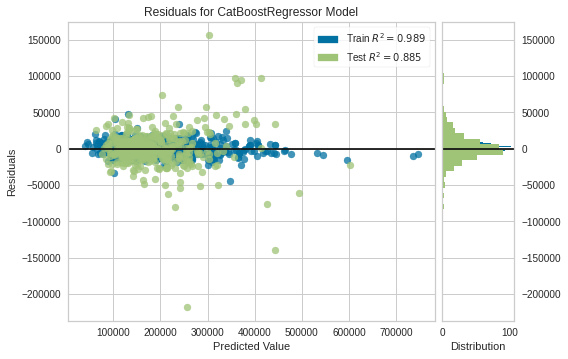

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [95]:
plot_model(tuned_model_catboost)

# Prediction error plot

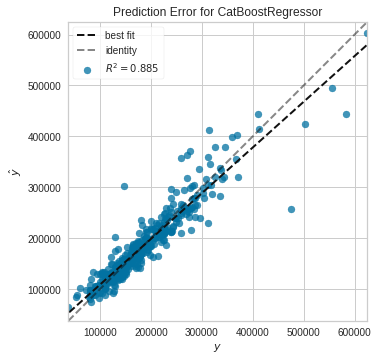

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [96]:
plot_model(tuned_model_catboost, plot = 'error')

# Feature importance plot

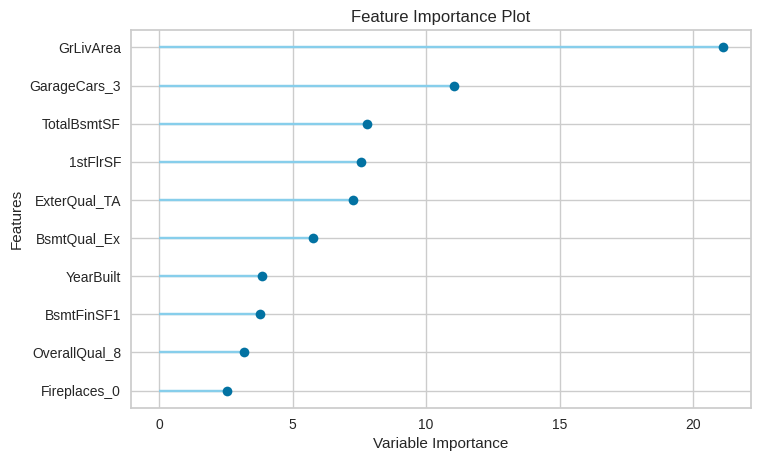

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [97]:
plot_model(tuned_model_catboost, plot = 'feature')

In [98]:
evaluate_model(tuned_model_catboost)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f594d08de10>, fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Finalizing model for deployment

In [99]:
final_model=finalize_model(tuned_model_catboost)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f594d08de10>, fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing <catboost.core.CatBoostRegressor object at 0x7f594d08de10>
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f594d08de10>, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:CatBoost Regressor Imported s

In [74]:
predict_model(final_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f594d07fa50>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model        MAE           MSE       RMSE      R2   RMSLE  \
0  CatBoost Regressor  5345.3288  4.853406e+07  6966.6388  0.9915  0.0455   

     MAPE  
0  0.0328

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   -1.272361e-07 -0.083283   1.006072      0.776422    0.425879   -0.932105   
1   -4.328227e-01 -0.073642  -2.291676     -1.686512   -0.573652   -0.932105   
2   -1.728379e+00 -0.706573   1.104025      0.921300    0.076043   -0.932105   
3    2.612252e-01 -0.058420   0.908119      0.631543   -0.573652    1.130870   
4   -4.328227e-01  0.061326  -0.822382     -1.686512   -0.573652    0.295101   
..            ...       ...        ...           ...         ...         ...   
434 -4.328227e-01 -0.349465  -1.834562      1.017886   -0.573652   -0.932105   
435 -8.955212e-01 -0.438970  -0.528524     -1.493340   -0.573652   -0.932105   
436  4.925745e-01 -0.008695   1.136676      0.969593    0.414773   -0.932105   
437  7.239237e-01  0.030375   1.071374      0.921300    1.047809    0.900240   
438 -5.716323e-01 -0.150158   0.842817      0.534958   -0.573652   -0.301575   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_Oth  \
0     -0.282439   0.712865    -0.373171 -0.704502  ...           0.0   
1     -0.282439   1.188206     0.088824 -0.175961  ...           0.0   
2     -0.282439   0.920123    -0.171733 -0.474048  ...           0.0   
3     -0.282439  -0.978989     0.117288 -0.143397  ...           0.0   
4     -0.282439  -0.528429    -0.309675 -0.293693  ...           0.0   
..          ...        ...          ...       ...  ...           ...   
434   -0.282439   0.262305    -0.811082 -0.982549  ...           0.0   
435   -0.282439   0.548410    -0.533009 -0.887362  ...           0.0   
436   -0.282439   1.041774    -0.053497 -0.318742  ...           0.0   
437   -0.282439  -0.981242    -0.123563 -0.398900  ...           0.0   
438   -0.282439   0.009991    -0.403825 -0.629354  ...           0.0   

     SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1.0                    0.0                    0.0   
1            1.0                    0.0                    0.0   
2            1.0                    0.0                    0.0   
3            1.0                    0.0                    0.0   
4            1.0                    0.0                    0.0   
..           ...                    ...                    ...   
434          1.0                    0.0                    0.0   
435          1.0                    0.0                    0.0   
436          1.0                    0.0                    0.0   
437          1.0                    0.0                    0.0   
438          1.0                    0.0                    0.0   

     SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0.0                   0.0                   1.0   
1                     0.0                   0.0                   1.0   
2                     0.0                   0.0                   1.0   
3                     0.0                   0.0                   1.0   
4                     0.0                   0.0                   1.0   
..                    ...                   ...                   ...   
434                   0.0                   0.0                   1.0   
435                   0.0                   0.0                   1.0   
436                   0.0                   0.0                   1.0   
437                   0.0                   0.0                   1.0   
438                   0.0                   0.0                   1.0   

     SaleCondition_Partial  SalePrice          Label  
0                      0.0     222500  220535.839840  
1                      0.0      87000   90985.772586  
2                      0.0     130000  135060.201578  
3                      0.0     274300  260785.167384  
4                      0.0     140000  138834.580671  
..                     ...        ...            ...  
434                    0.0     127000  118501.985791  
435                    0.0      93000   95722.663665  
436            

# Predicting on the Test set

In [100]:
predict_model(final_model, data=test_dataset)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f5950ab68d0>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model         MAE           MSE        RMSE       R2   RMSLE  \
0  CatBoost Regressor  47992.7563  3.816559e+09  61778.3072 -12.9971  0.3391   

     MAPE  
0  0.2686

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...    NaN  MnPrv         NaN       0      6   
1            Lvl    AllPub  ...    NaN    NaN        Gar2   12500      6   
2            Lvl    AllPub  ...    NaN  MnPrv         NaN       0      3   
3            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
4            HLS    AllPub  ...    NaN    NaN         NaN       0      1   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1454         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
1455         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   
1456         Lvl    AllPub  ...    NaN    NaN         NaN       0      9   
1457         Lvl    AllPub  ...    NaN  MnPrv        Shed     700      7   
1458         Lvl    AllPub  ...    NaN    NaN         NaN       0     11   

     YrSold SaleType  SaleCondition      SalePrice          Label  
0      2010       WD         Normal  169277.052498  120724.693932  
1      2010       WD         Normal  187758.393989  171092.324551  
2      2010       WD         Normal  183583.683570  183747.806369  
3      2010       WD         Normal  179317.477511  194721.729006  
4      2010       WD         Normal  150730.079977  195174.716543  
...     ...      ...            ...            ...            ...  
1454   2006       WD         Normal  167081.220949   83555.030459  
1455   2006       WD        Abnorml  164788.778231   83981.549035  
1456   2006       WD        Abnorml  219222.423400  171779.587052  
1457   2006       WD         Normal  184924.279659  135108.821135  
1458   2006       WD         Normal  187741.866657  225378.598450  

[1459 rows x 82 columns]